# Plot of R-squared value in relation to sum of sale, and quartiles

This plot illustrates Relationship between R-squared values, their corresponding quartiles, and the sum of sales across municipalities.

Script by Lars Kjær

In [1]:
from pathlib import Path
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load parameter data
input_path = Path.cwd() / 'ml_data/fitted_models' # path of files to be found
parameter_data = pd.read_csv(input_path / 'all_metrics_lasso_year.csv')


# Load municipality data
muni_codes = pd.read_csv('municipality_number_codes.csv', sep=';', names=['muni_name', 'muni_code'] )

# Merge the parameter and the geo data 

merged_df = muni_codes.merge(parameter_data, on='muni_code')
merged_df = merged_df.loc[:, ['muni_code', 'muni_name', 'rmse', 'r2']]


# get data on numbers of sales 
inlier_data_path = Path.cwd() / 'Boliga data/inlier_data/'
files = os.listdir(inlier_data_path)
dfs =  []
for i in files:
    df = pd.read_csv(inlier_data_path/i, low_memory=False)
    dfs.append(df)
    
    
# concat dataframes, wrangle, send back to new dataframe, and merge into 'merged_df' 
new_df = pd.concat(dfs)
new_df = new_df['municipality'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'muni_code', 'municipality': 'sum_sale'})

merged_df = merged_df.merge(new_df, on='muni_code', how='left')

In [3]:
# Calculate summary statistics using describe()
summary_stats = merged_df['r2'].describe()

# Extract quartile values from the summary statistics
q1 = summary_stats['25%']
q2 = summary_stats['50%']
q3 = summary_stats['75%']

# Create a function to assign quartile labels
def assign_quartile(value):
    if value <= q1:
        return 'q1'
    elif value <= q2:
        return 'q2'
    elif value <= q3:
        return 'q3'
    else:
        return 'q4'

# Add quartile labels column to the DataFrame
merged_df['quartiles'] = merged_df['r2'].apply(assign_quartile)

# sort value 'r2'
sort_merged_data = merged_df.sort_values('r2').reset_index(drop=True)

# subset q4 
sort_merged_data_q4 = sort_merged_data[sort_merged_data['quartiles'] == 'q4']

#sort_merged_data_q4.sort_values('r2', ascending=False).head(10) 

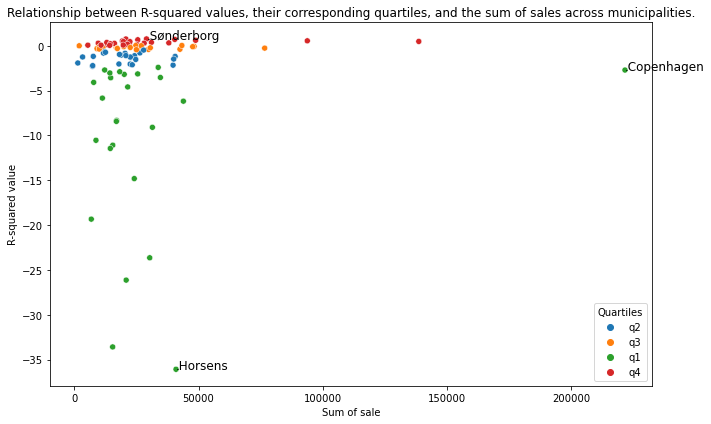

In [4]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

sns.scatterplot(data = merged_df, x='sum_sale', y='r2', hue='quartiles')

# Customize title and labels
plt.title("Relationship between R-squared values, their corresponding quartiles, and the sum of sales across municipalities.")
plt.xlabel('Sum of sale')
plt.ylabel('R-squared value')

# Customize spines
#sns.despine(left=True, bottom=True)

# Add text annotation
x_val_cph = merged_df[merged_df['muni_name'] == 'København']['sum_sale']
y_val_cph = merged_df[merged_df['muni_name'] == 'København']['r2']
plt.text(x_val_cph, y_val_cph, '.Copenhagen', fontsize=12, color='black')


# Add text annotation
x_val_sonder = merged_df[merged_df['muni_name'] == 'Sønderborg']['sum_sale']
y_val_sonder = merged_df[merged_df['muni_name'] == 'Sønderborg']['r2']
plt.text(x_val_sonder, y_val_sonder, '.Sønderborg', fontsize=12, color='black')

# Add text annotation
x_val_horsens = merged_df[merged_df['muni_name'] == 'Horsens']['sum_sale']
y_val_horsens = merged_df[merged_df['muni_name'] == 'Horsens']['r2']
plt.text(x_val_horsens, y_val_horsens, '.Horsens', fontsize=12, color='black')

# Move the legend
order = []
plt.legend(title='Quartiles', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()